In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Saving test.jpg to test (13).jpg


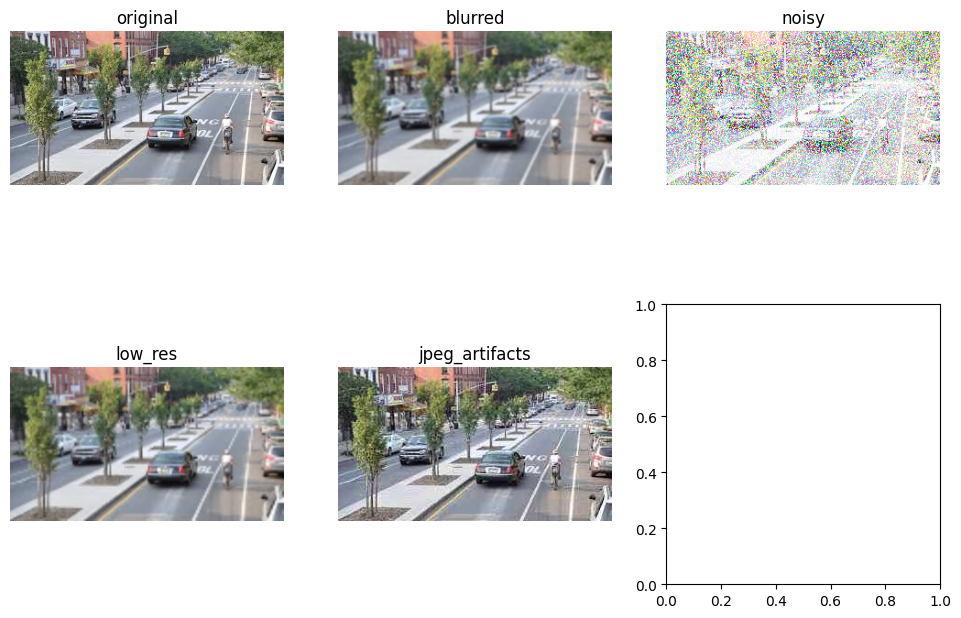

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO  # YOLOv8 modelis
from google.colab import files

uploaded = files.upload()

# 1. Vaizdo degradacijos funkcijos
def apply_gaussian_blur(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def reduce_resolution(image, scale=0.5):
    h, w = image.shape[:2]
    low_res = cv2.resize(image, (int(w*scale), int(h*scale)))
    return cv2.resize(low_res, (w, h))

def apply_jpeg_compression(image, quality=30):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, enc_img = cv2.imencode('.jpg', image, encode_param)
    return cv2.imdecode(enc_img, cv2.IMREAD_COLOR)

    # 4. Rezultatų vizualizacija
def plot_results(degraded_images):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    for i, (key, img) in enumerate(degraded_images.items()):
        ax = axes[i//3, i%3]
        ax.imshow(img)
        ax.set_title(key)
        ax.axis("off")


# Pavyzdinis iškvietimas

plot_results(degraded_images)

Saving test.jpg to test (14).jpg

0: 384x640 1 person, 7 cars, 143.3ms
Speed: 3.2ms preprocess, 143.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 5 cars, 137.3ms
Speed: 3.7ms preprocess, 137.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 152.3ms
Speed: 3.6ms preprocess, 152.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 4 cars, 133.9ms
Speed: 3.7ms preprocess, 133.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 cars, 1 truck, 134.7ms
Speed: 3.9ms preprocess, 134.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


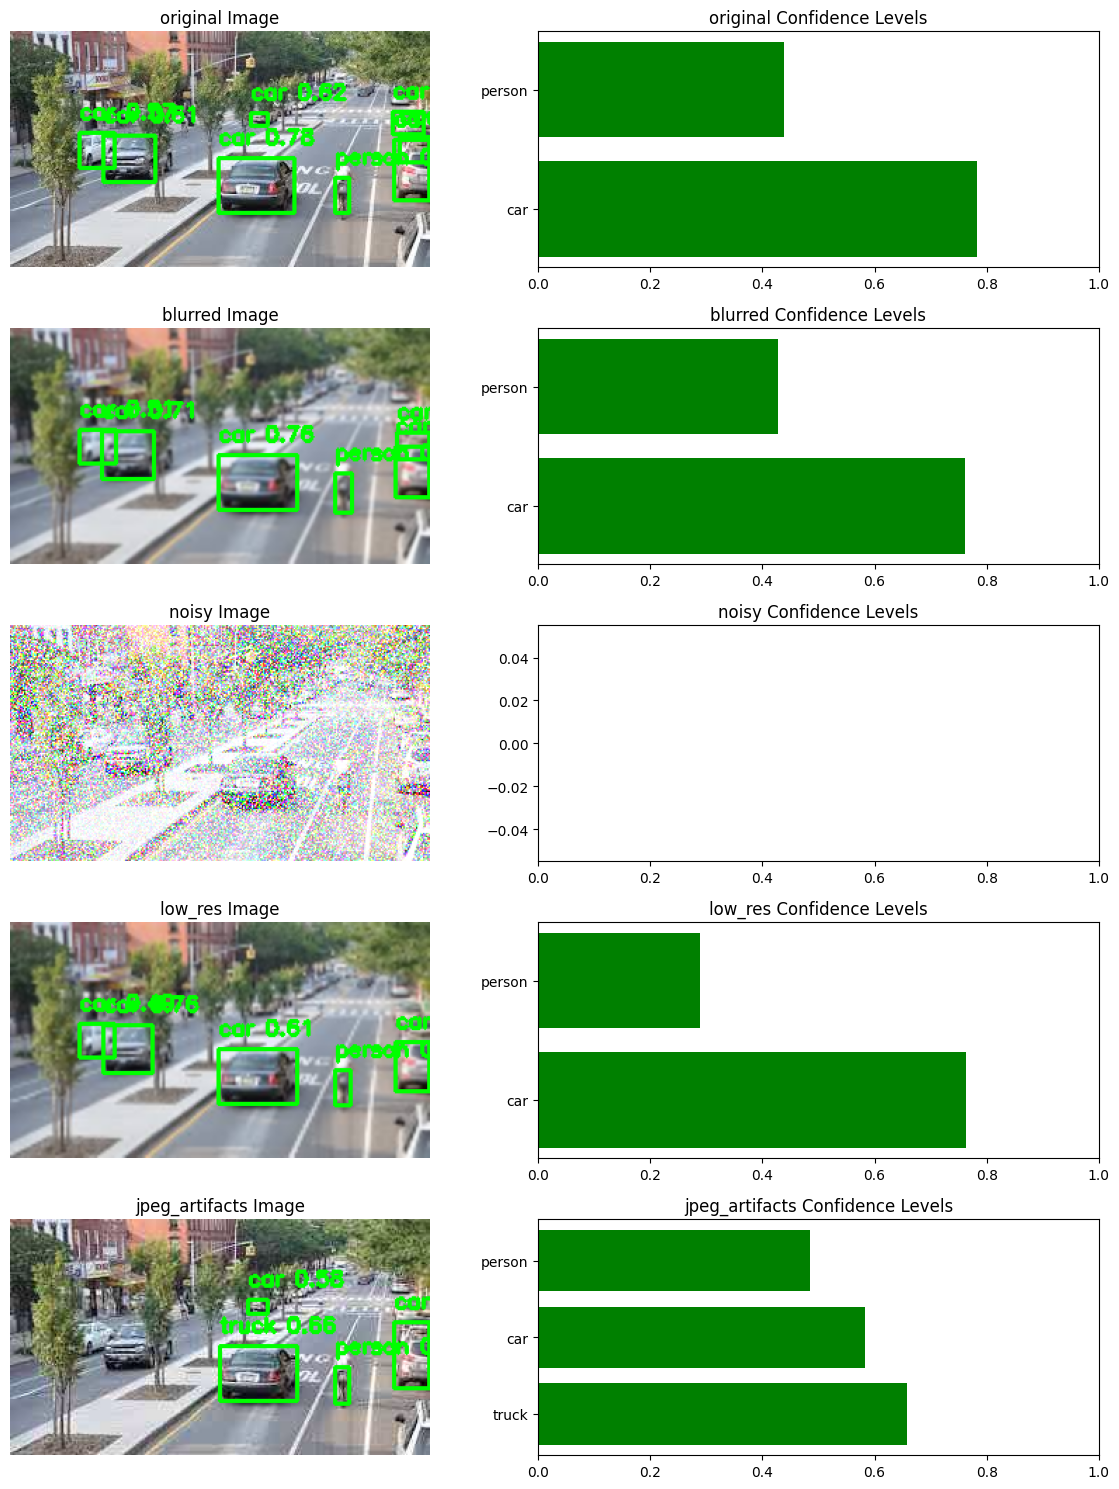

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files

uploaded = files.upload()

# 1. Vaizdo degradacijos funkcijos
def apply_gaussian_blur(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def reduce_resolution(image, scale=0.5):
    h, w = image.shape[:2]
    low_res = cv2.resize(image, (int(w*scale), int(h*scale)))
    return cv2.resize(low_res, (w, h))

def apply_jpeg_compression(image, quality=30):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, enc_img = cv2.imencode('.jpg', image, encode_param)
    return cv2.imdecode(enc_img, cv2.IMREAD_COLOR)

# 2. Įkeliame modelį
model = YOLO("yolov8n.pt")

def detect_objects(image):
    results = model(image)
    return results[0]

# 3. Vaizdo analizė su degradacija
def analyze_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    degraded_images = {
        "original": image_rgb,
        "blurred": apply_gaussian_blur(image_rgb),
        "noisy": add_gaussian_noise(image_rgb),
        "low_res": reduce_resolution(image_rgb),
        "jpeg_artifacts": apply_jpeg_compression(image_rgb)
    }

    results = {}
    for key, img in degraded_images.items():
        results[key] = detect_objects(img)

    return degraded_images, results

# 4. Rezultatų vizualizacija su objekto žymėjimu
def draw_boxes(image, results):
    img = image.copy()
    for result in results.boxes.data:
        x1, y1, x2, y2, conf, cls = result.tolist()
        label = f"{model.names[int(cls)]} {conf:.2f}"
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img

def plot_results(degraded_images, results):
    fig, axes = plt.subplots(len(degraded_images), 2, figsize=(12, 15))

    for i, (key, img) in enumerate(degraded_images.items()):
        detected_img = draw_boxes(img, results[key])

        # Vaizdas su aptiktais objektais
        axes[i, 0].imshow(detected_img)
        axes[i, 0].set_title(f"{key} Image")
        axes[i, 0].axis("off")

        # Diagrama su pasitikėjimo lygiais
        confidences = [res[4] for res in results[key].boxes.data.tolist()]
        labels = [model.names[int(res[5])] for res in results[key].boxes.data.tolist()]
        axes[i, 1].barh(labels, confidences, color='green')
        axes[i, 1].set_xlim(0, 1)
        axes[i, 1].set_title(f"{key} Confidence Levels")

    plt.tight_layout()
    plt.show()

# Pavyzdinis iškvietimas
degraded_images, results = analyze_image("test.jpg")
plot_results(degraded_images, results)
